In [23]:
pip install ucimlrepo

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


In [25]:
#Fetching the dataset and converting it into a pandas Dataframe
#This code to fetch the dataset was made available on the link from the manual

from ucimlrepo import fetch_ucirepo
iris = fetch_ucirepo(id=53)

X = iris.data.features
y = iris.data.targets
iris_data = pd.concat([X, y], axis=1)

iris_data.head()
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


There are no null values in the dataset as demonstrated by the output above.

In [26]:
#encoding the class(target variable)
iris_data['class'] = iris_data['class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
iris_data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
#Splitting the dataset
iris_features = iris_data[['sepal length', 'sepal width', 'petal length', 'petal width']]
iris_target = iris_data['class']
iris_features_train, iris_features_test, iris_target_train, iris_target_test = train_test_split(iris_features, iris_target, test_size=0.3, random_state=42)

In [28]:
#Normalising numerical features
scaler = StandardScaler()
iris_features_train = scaler.fit_transform(iris_features_train)
iris_features_test = scaler.transform(iris_features_test)

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(iris_features_train, iris_target_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
knn_predictions = knn_model.predict(iris_features_test)
accuracy = accuracy_score(iris_target_test, knn_predictions)
print("Accuracy:", accuracy)
recall = recall_score(iris_target_test, knn_predictions, average='weighted')
print("Recall:", recall)
precision = precision_score(iris_target_test, knn_predictions, average='weighted')
print("Precision:", precision)

Accuracy: 1.0
Recall: 1.0
Precision: 1.0


In [31]:
confusion_mat = confusion_matrix(iris_target_test, knn_predictions)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


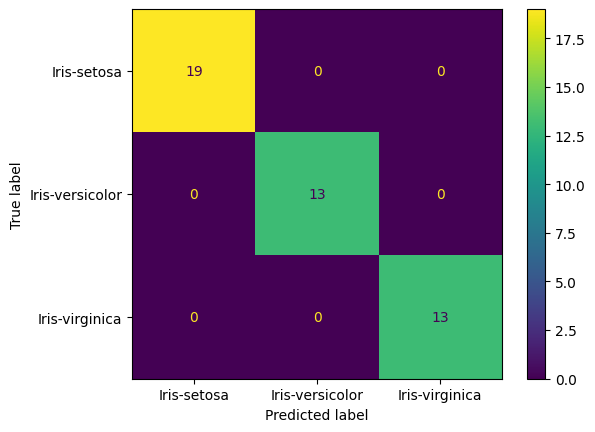

In [32]:
cmatdisplay = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
cmatdisplay.plot()
plt.show()

Decision tree

In [33]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(iris_features_train, iris_target_train)

DecisionTreeClassifier()

In [34]:
tree_predictions = decision_tree_model.predict(iris_features_test)
accuracy = accuracy_score(iris_target_test, tree_predictions)
print("Accuracy:", accuracy)
recall = recall_score(iris_target_test, tree_predictions, average='weighted')
print("Recall:", recall)
precision = precision_score(iris_target_test, tree_predictions, average='weighted')
print("Precision:", precision)

Accuracy: 1.0
Recall: 1.0
Precision: 1.0


In [35]:
confusion_mat = confusion_matrix(iris_target_test, tree_predictions)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


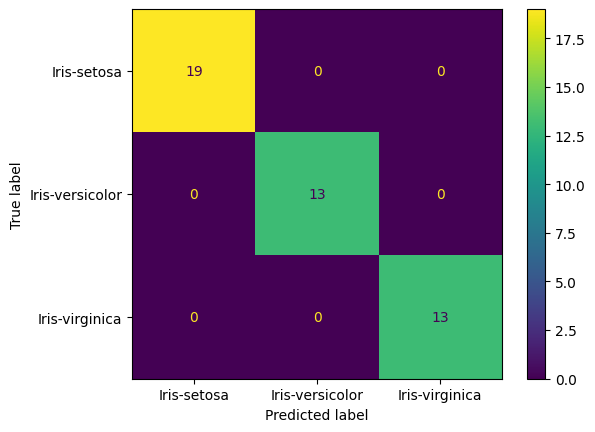

In [37]:
cmdisplay = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
cmdisplay.plot()
plt.show()

# **Model Performance Comparison Report**

**Dataset Overview**:
The Iris dataset was utilized in this analysis. It was sourced from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/iris). The dataset comprises three classes of iris plants: Setosa, Versicolor, and Virginica, with 50 instances per class and four features (sepal length, sepal width, petal length, and petal width). The features were concatenated with the target variable to form a unified DataFrame.

# Data Preprocessing:

**Null Value Check**:

Upon inspecting the DataFrame with .info(), no null values were detected, confirming data completeness.

**Dataset Splitting**:

The dataset was divided into training and test sets using a 70:30 ratio. This ensured 70% of the data was used for training the models and 30% for testing their performance.

**Normalization:**

A StandardScaler was applied to normalize the training set. The same transformation was applied to the test set to maintain consistency and avoid data leakage.

# Models Evaluated:

**K-Nearest Neighbors (KNN):**

A supervised learning algorithm that classifies data points based on the majority class of their nearest neighbors.

**Decision Tree**:

A tree-structured classifier that splits data at each node based on the feature that provides the best information gain or Gini index improvement.

# Performance Metrics:
The models were evaluated using the following metrics:

**Precision**: Proportion of true positive predictions out of all positive predictions.

**Recall**: Proportion of true positive predictions out of all actual positives.

**Accuracy**: Overall correctness of the model, defined as the ratio of correct predictions to the total number of predictions.

**Confusion Matrix**: Provides a detailed breakdown of the model's performance for each class.

# Confusion Matrix:

| Metric       | KNN  | Decision Tree |
|--------------|------|---------------|
| **Precision** | 1.0  | 1.0           |
| **Recall**    | 1.0  | 1.0           |
| **Accuracy**  | 1.0  | 1.0           |

Both models produced a confusion matrix where the predicted labels matched the true labels for all instances in the test set, indicating perfect classification performance.

# Conclusion:
Both the KNN and Decision Tree models performed excellently on the Iris dataset, with precision, recall, and accuracy scores of 1.0.